In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

image_dimensions = {'height': 256, 'width': 256, 'channels': 3}


In [ ]:
# Creating a classifier for mesoNet

class Classifier:
    def __init__(self):
        self.model = 0

    def predict(self, x):
        return self.model.predict(x)

    def fit(self, x, y):
        return self.model.train_on_batch(x, y)

    def get_accuracy(self, x, y):
        return self.model.test_on_batch(x, y)

    def load(self, path):
        self.model.load_weights(path)




In [ ]:
class Meso4(Classifier):
    def __init__(self, learning_rate = 0.001):
        self.model = self.init_model()
        optimizer = Adam(learning_rate = learning_rate)
        self.model.compile(optimizer = optimizer,
                           loss = 'mean_squared_error',
                           metrics = ['accuracy'])

    def init_model(self):
        x = Input(shape = (image_dimensions['height'],
                           image_dimensions['width'],
                           image_dimensions['channels']))

        x1 = Conv2D(8, (3, 3), padding='same', activation = 'relu')(x)
        x1 = BatchNormalization()(x1)
        x1 = MaxPooling2D(pool_size=(2, 2), padding='same')(x1)

        x2 = Conv2D(8, (5, 5), padding='same', activation = 'relu')(x1)
        x2 = BatchNormalization()(x2)
        x2 = MaxPooling2D(pool_size=(2, 2), padding='same')(x2)

        x3 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x2)
        x3 = BatchNormalization()(x3)
        x3 = MaxPooling2D(pool_size=(2, 2), padding='same')(x3)

        x4 = Conv2D(16, (5, 5), padding='same', activation = 'relu')(x3)
        x4 = BatchNormalization()(x4)
        x4 = MaxPooling2D(pool_size=(4, 4), padding='same')(x4)

        y = Flatten()(x4)
        y = Dropout(0.5)(y)
        y = Dense(16)(y)
        y = LeakyReLU(alpha=0.1)(y)
        y = Dropout(0.5)(y)
        y = Dense(1, activation = 'sigmoid')(y)

        return Model(inputs = x, outputs = y)

In [ ]:
meso = Meso4()
meso.load('/content/drive/MyDrive/Mesonet/weights/Meso4_DF.h5')

1/1 [==============================] - 1s 1s/step


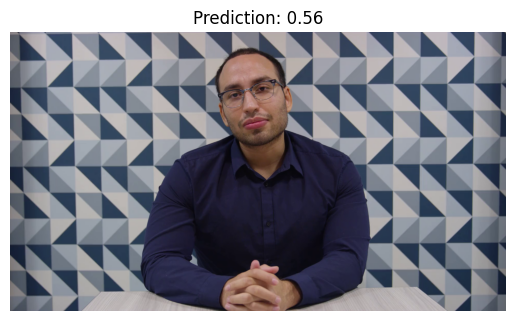

The image is classified as real.


In [ ]:


def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Resize the image to match the input dimensions of the model
    img = cv2.resize(img, (image_dimensions['width'], image_dimensions['height']))
    # Convert image to float32 and normalize it
    img = img.astype('float32') / 255.0
    # Expand dimensions to match the input shape of the model
    img = np.expand_dims(img, axis=0)
    return img

def predict_on_image(model, image_path):
    # Preprocess the image
    img = preprocess_image(image_path)
    # Make prediction using the model
    prediction = model.predict(img)
    return prediction

def classify_image(model, image_path, threshold=0.5):
    # Make prediction on the image
    prediction = predict_on_image(model, image_path)

    # Load and display the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title('Prediction: {:.2f}'.format(prediction[0][0]))
    plt.show()

    # Classify the image based on the threshold
    if prediction > threshold:
        print("The image is classified as real.")
    else:
        print("The image is classified as fake.")

# Example usage:
image_path = '/content/drive/MyDrive/Resnext_inception/examples/real_frame_16.png'
classify_image(meso.model, image_path)

1/1 [==============================] - 0s 125ms/step


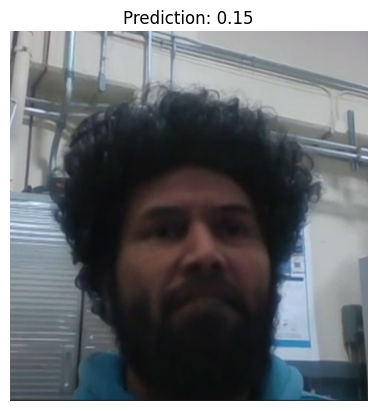

The image is classified as fake.


In [ ]:
image_path = '/content/drive/MyDrive/Mesonet/data/df/Screenshot 2024-03-27 045230.png'
classify_image(meso.model, image_path)

1/1 [==============================] - 0s 262ms/step


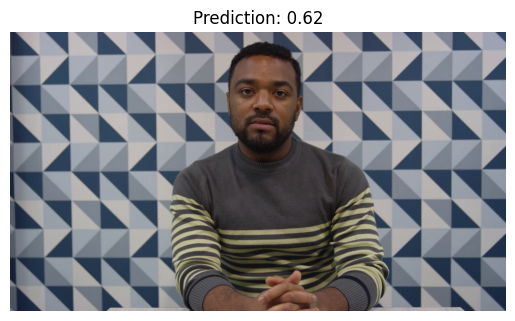

The image is classified as real.


In [ ]:

image_path = '/content/drive/MyDrive/Resnext_inception/examples/real_frame_20.png'
classify_image(meso.model, image_path)

1/1 [==============================] - 0s 86ms/step


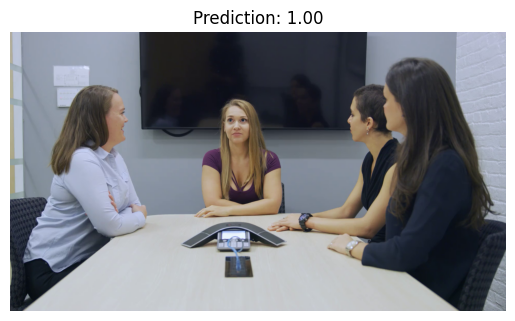

The image is classified as real.
1/1 [==============================] - 0s 40ms/step


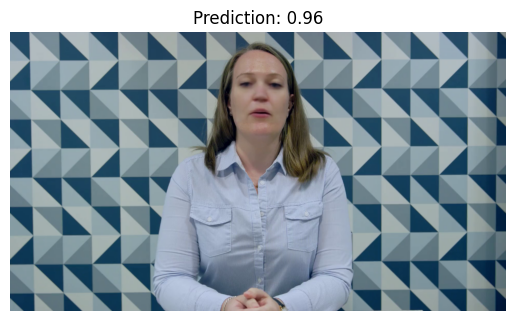

The image is classified as real.
1/1 [==============================] - 0s 40ms/step


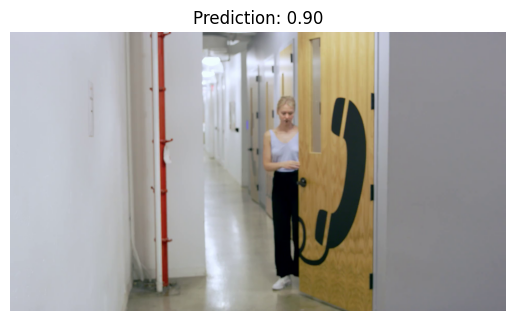

The image is classified as real.
1/1 [==============================] - 0s 37ms/step


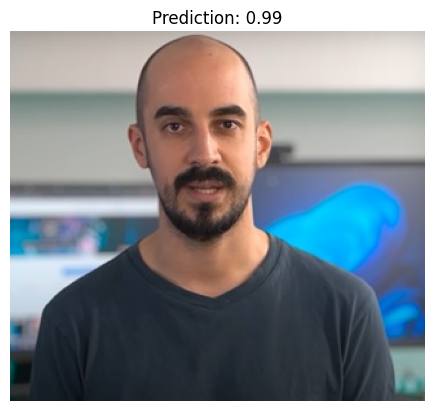

The image is classified as real.
1/1 [==============================] - 0s 38ms/step


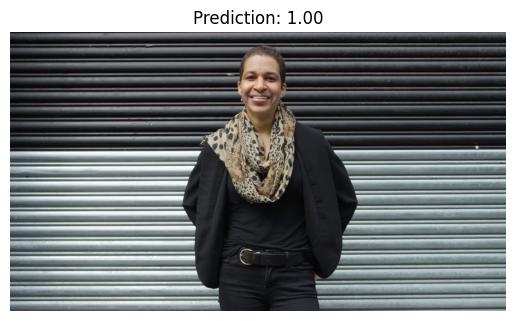

The image is classified as real.
1/1 [==============================] - 0s 44ms/step


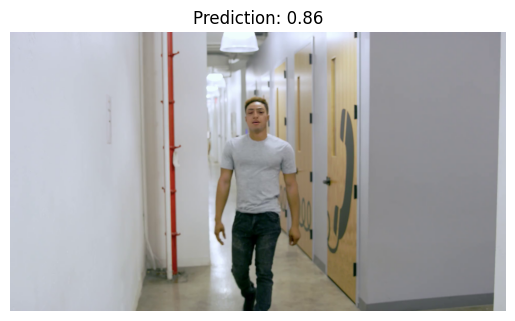

The image is classified as real.
1/1 [==============================] - 0s 39ms/step


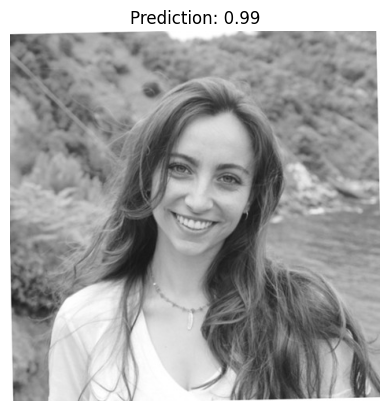

The image is classified as real.
1/1 [==============================] - 0s 39ms/step


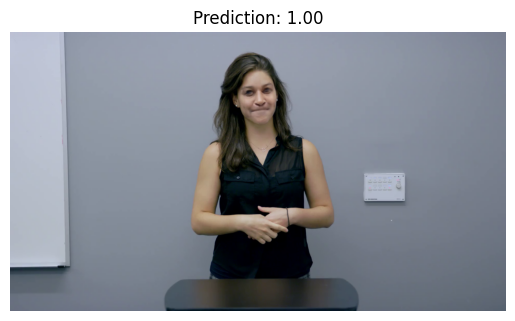

The image is classified as real.
1/1 [==============================] - 0s 38ms/step


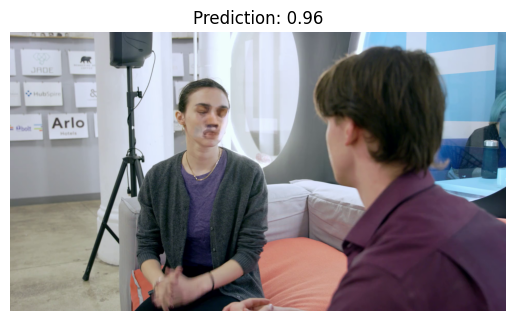

The image is classified as real.
1/1 [==============================] - 0s 43ms/step


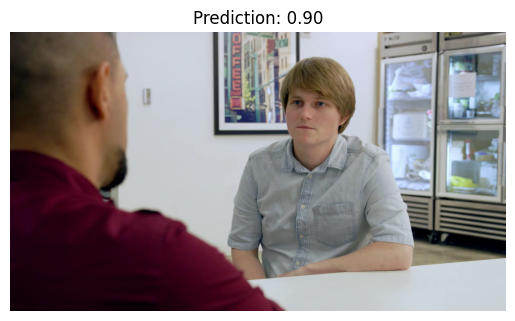

The image is classified as real.
1/1 [==============================] - 0s 53ms/step


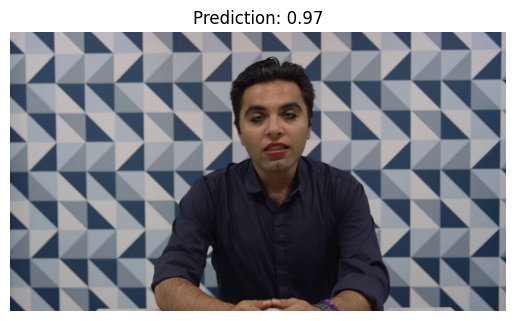

The image is classified as real.
1/1 [==============================] - 0s 60ms/step


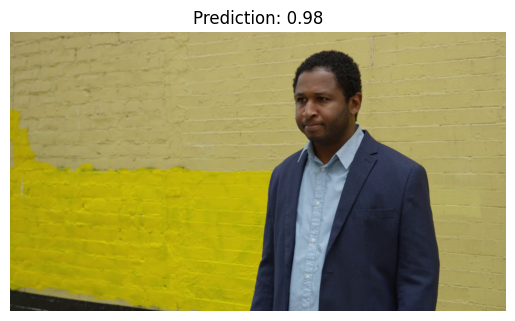

The image is classified as real.
1/1 [==============================] - 0s 66ms/step


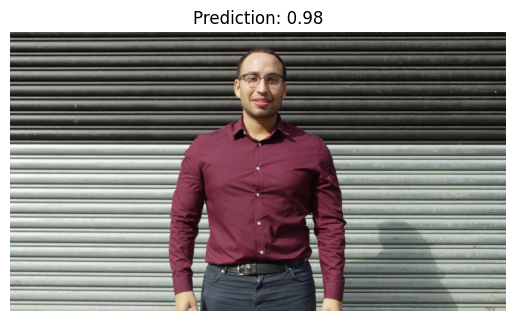

The image is classified as real.
1/1 [==============================] - 0s 73ms/step


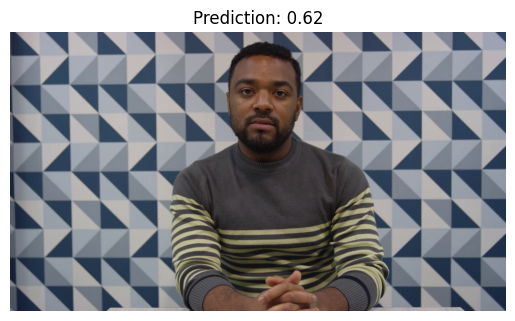

The image is classified as real.
1/1 [==============================] - 0s 38ms/step


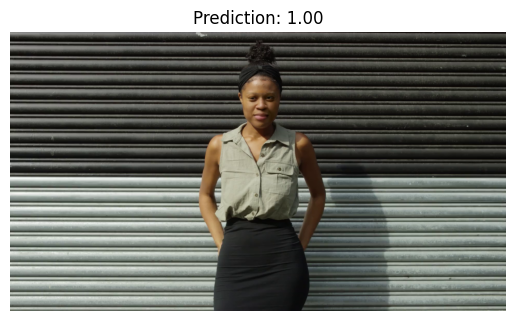

The image is classified as real.
1/1 [==============================] - 0s 40ms/step


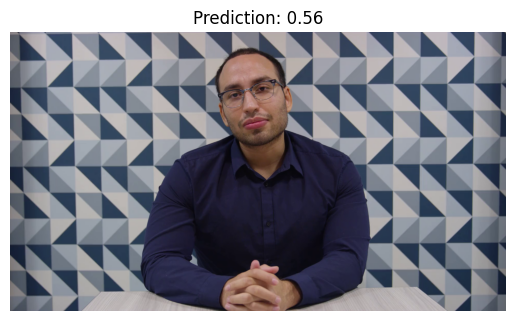

The image is classified as real.
1/1 [==============================] - 0s 40ms/step


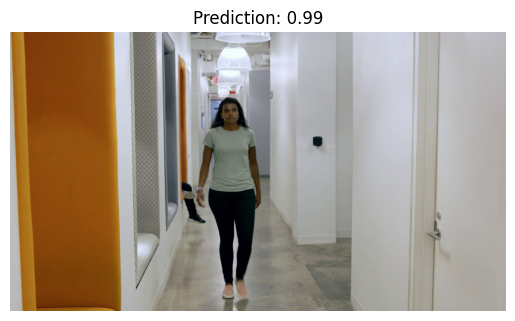

The image is classified as real.
1/1 [==============================] - 0s 36ms/step


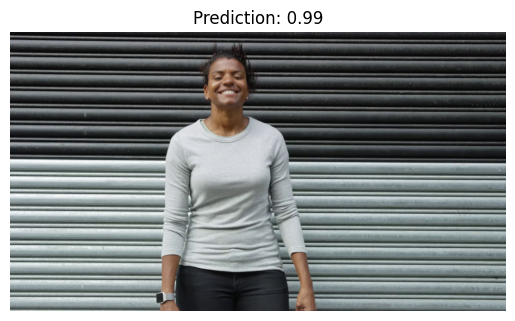

The image is classified as real.
1/1 [==============================] - 0s 39ms/step


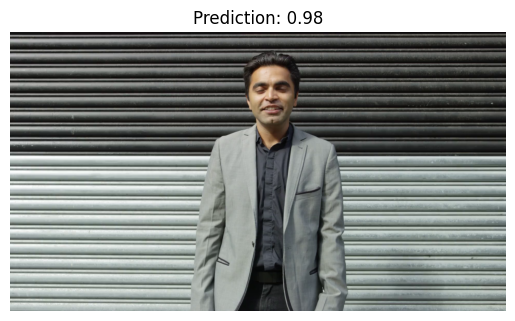

The image is classified as real.
1/1 [==============================] - 0s 39ms/step


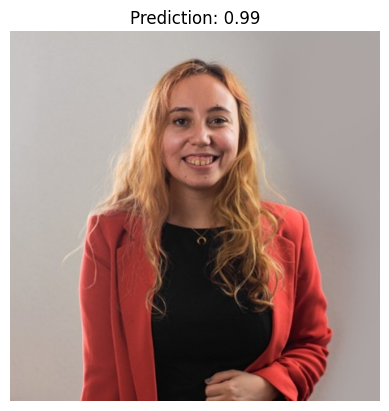

The image is classified as real.
1/1 [==============================] - 0s 37ms/step


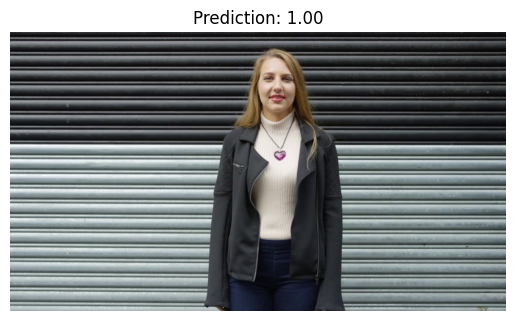

The image is classified as real.


In [ ]:
import os
import glob

def load_images_from_folder(folder_path):
    # Initialize an empty list to store image paths
    image_paths = []

    # Iterate over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image (you can add more extensions if needed)
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.gif')):
            # Construct the full path to the image file
            image_path = os.path.join(folder_path, filename)
            # Add the path to the list of image paths
            image_paths.append(image_path)

    # Return the list of image paths
    return image_paths

# Provide the path to your folder containing images
folder_path = '/content/drive/MyDrive/Resnext_inception/examples'

# Load images from the folder
image_paths = load_images_from_folder(folder_path)

# Print the paths of the images
for path in image_paths:
  classify_image(meso.model, path)
